In [1]:
# Importing required libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
# Reading the cleaned and processed data file.

df = pd.read_csv('./Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
# Removing the first column as this column is not useful for us in further processing.

df = df.drop(columns=df.columns[0], axis=1)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
# Ensuring there are no Null values in the dataset.

df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

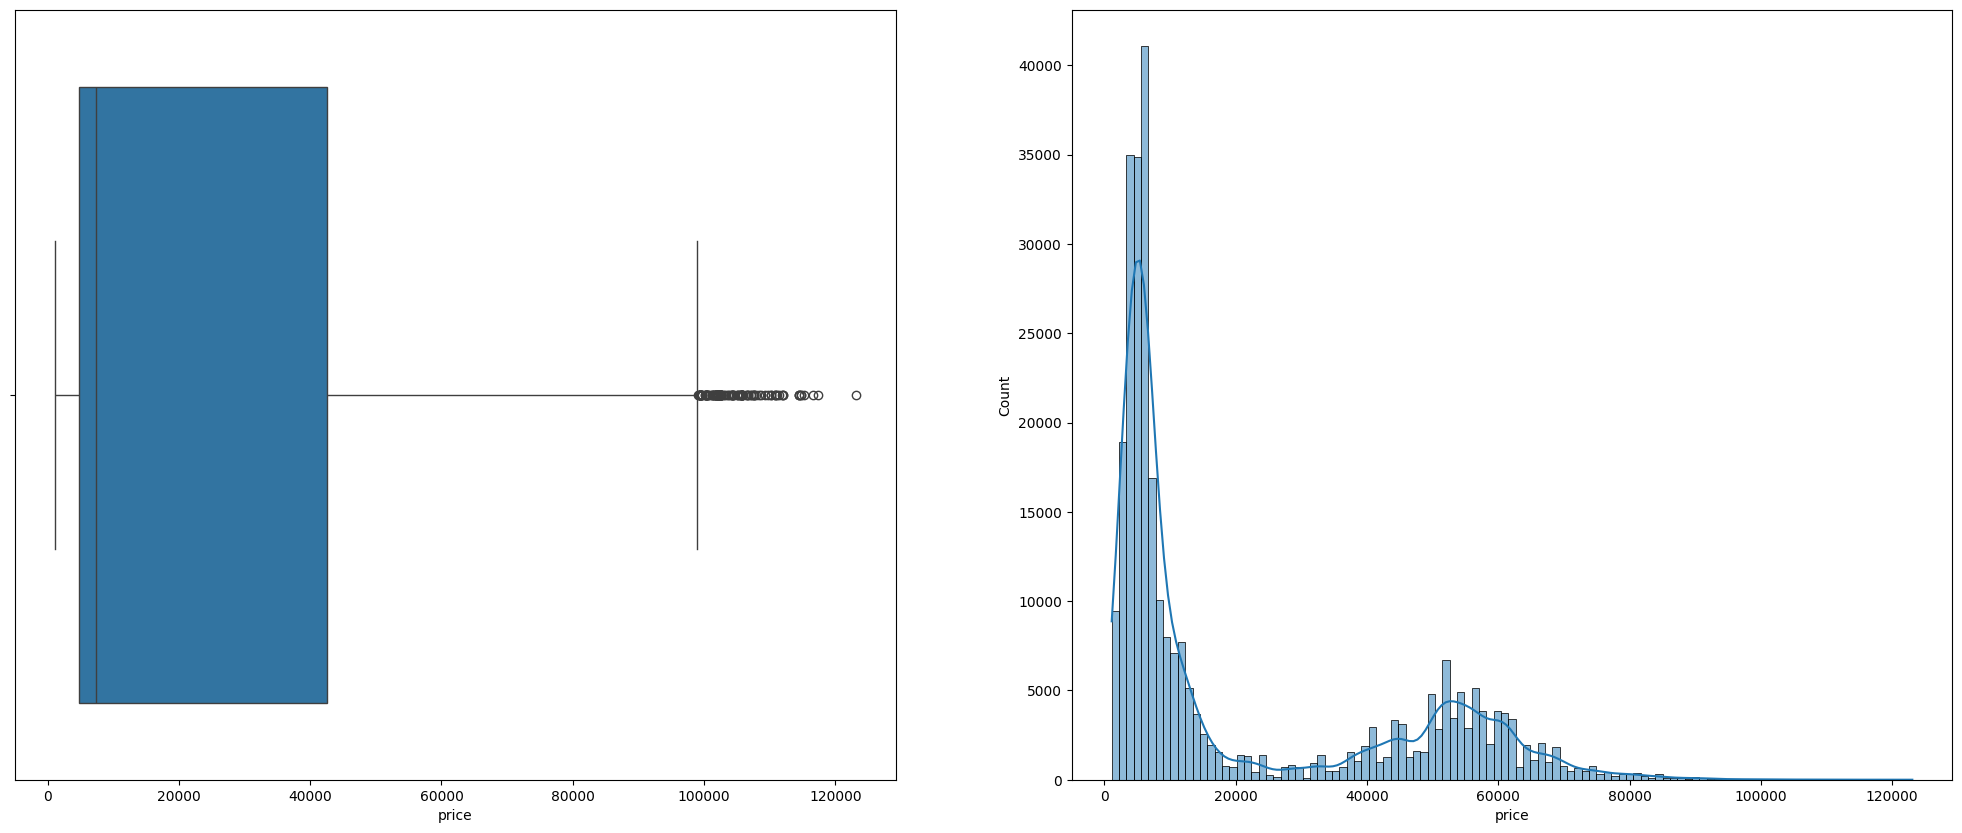

In [5]:
plt.figure(figsize = (25,10))
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = df)
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = df, kde = True)

From the above Box plot, we can observe that the median value is approximately 7500. However from the previous data analysis the mean is around 20000. The above significant difference in data distribution can be explained by the two different type of tickets; Business and Economy classes. We can infer from the second graph that the dispersion seems to be composed by two gaussian curves which also strengthens the above conclusion.

## Visualising the difference between Economy and Business classes.

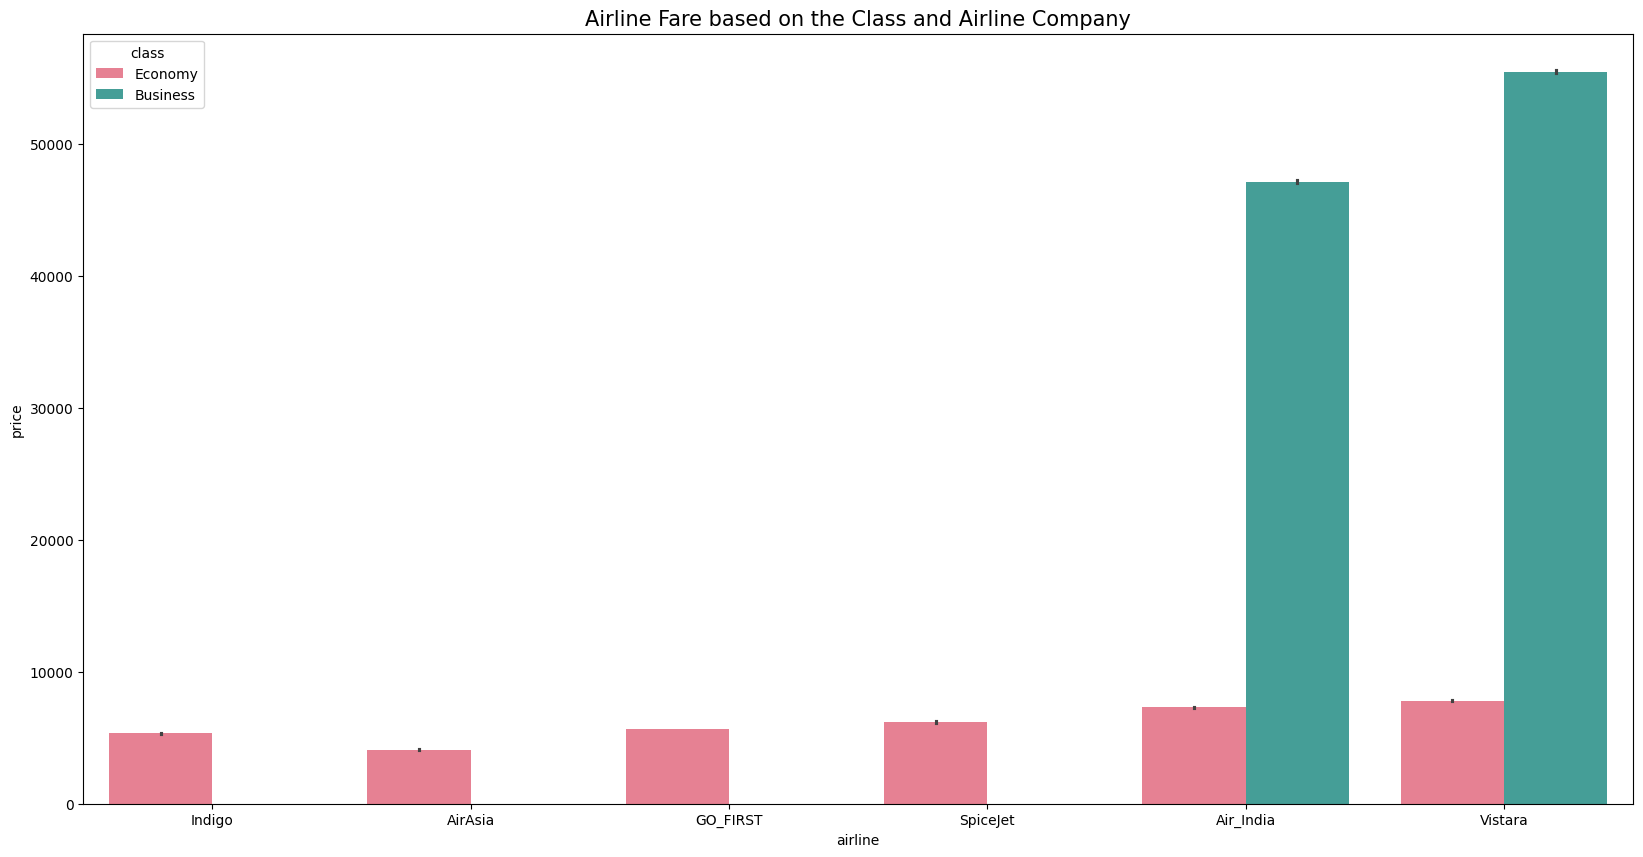

In [6]:
custom_palette = sns.color_palette("husl", 2)

# Plotting the bar plot

plt.figure(figsize=(20, 10))
sns.barplot(x='airline', y='price', hue="class", data=df.sort_values("price"), palette=custom_palette)
plt.title('Airline Fare based on the Class and Airline Company', fontsize=15)
plt.show()


From the above graph, we can conclude that Business class flights are only provided by two companies, Air India and Vistara. This conclusion is specific to this dataset. We can observe the dramatic difference between the ticket prices of the Economy and Business classes. 

### Visualizing the variation in the price depending on the number of days left to book a flight

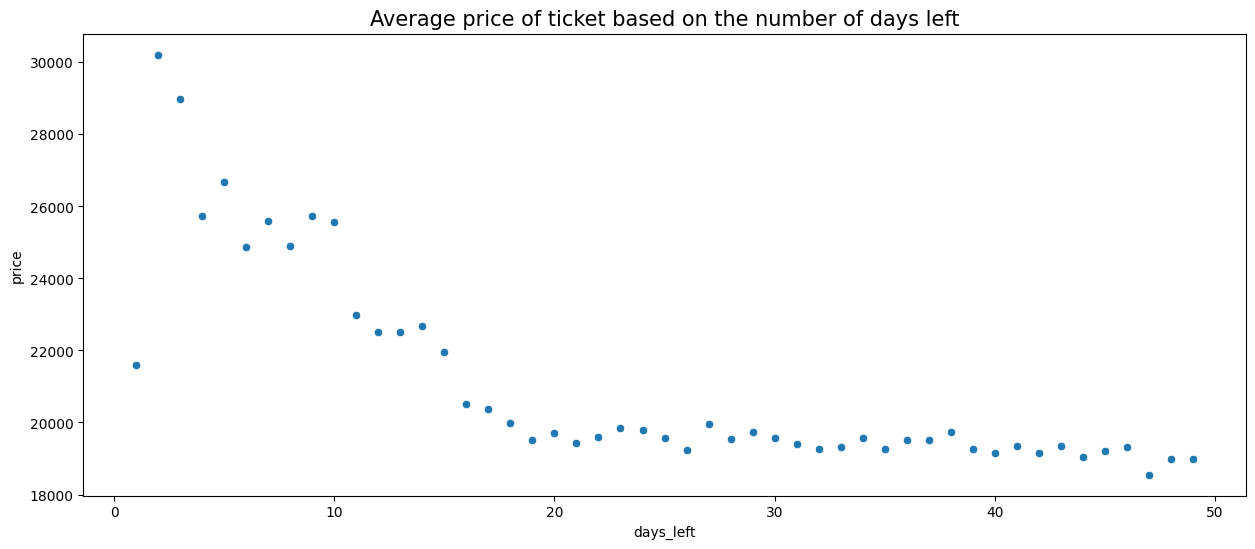

In [7]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Average price of ticket based on the number of days left",fontsize=15)

Having a closer look at the above graph will give us the following results

<Axes: xlabel='days_left', ylabel='price'>

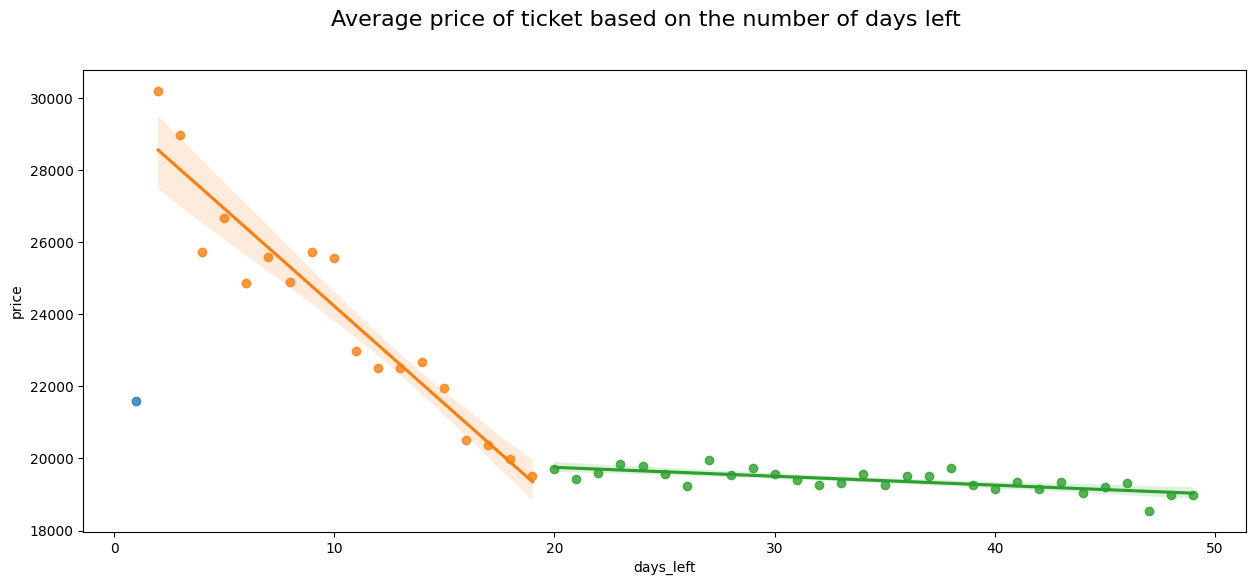

In [8]:
plt.figure(figsize=(15, 6)).suptitle("Average price of ticket based on the number of days left", fontsize=16)
ax = plt.axes()
sns.regplot(x=df_temp.loc[df_temp["days_left"] == 1].days_left,
            y=df_temp.loc[df_temp["days_left"] == 1].price,
            fit_reg=False,
            ax=ax,)

sns.regplot(x=df_temp.loc[(df_temp["days_left"] > 1) & (df_temp["days_left"] < 20)].days_left,
            y=df_temp.loc[(df_temp["days_left"] > 1) & (df_temp["days_left"] < 20)].price,
            fit_reg=True,
            ax=ax,)

sns.regplot(x=df_temp.loc[df_temp["days_left"] >= 20].days_left,
            y=df_temp.loc[df_temp["days_left"] >= 20].price,
            fit_reg=True,
            ax=ax,)

Based on the analysis of the above graph, it can be observed that the ticket prices exhibit a gradual increase followed by a sharp rise approximately 20 days prior to the flight. However, prices drop significantly just one day before the flight, reaching a nominal level. This pricing trend can be attributed to airlines' strategies to maximize occupancy by reducing prices as the departure date approaches, ensuring that all seats are filled. This approach helps airlines to avoid flying with empty seats, ultimately optimizing their revenue.

In [9]:
# We'll encode the categorical variables "stops" and "class" into integers.

df["stops"] = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
df["class"] = df["class"].replace({'Economy':0,'Business':1}).astype(int)

C:\Users\Aryan\AppData\Local\Temp\ipykernel_12624\269254951.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["stops"] = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
C:\Users\Aryan\AppData\Local\Temp\ipykernel_12624\269254951.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["class"] = df["class"].replace({'Economy':0,'Business':1}).astype(int)


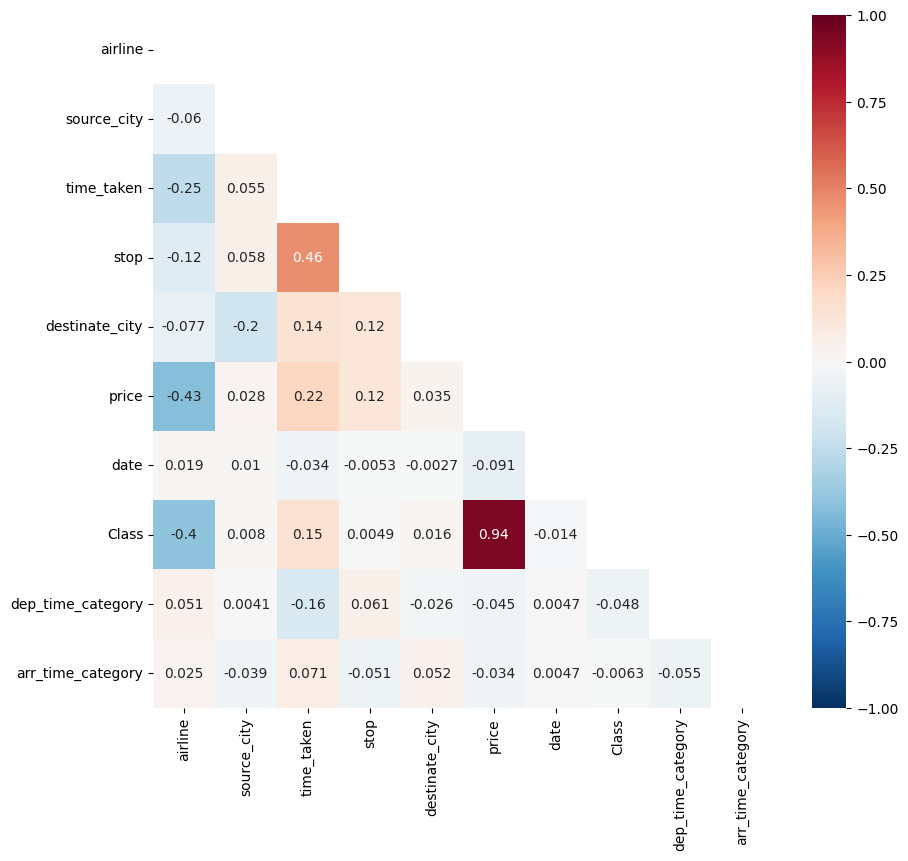

In [10]:
from IPython.display import Image

image_path = 'Correlation Matrix.png'

# Displaying the Correlation Matrix
Image(filename=image_path)

Previously, In the EDA part of the project, we concluded that Airfare is highly correlated to flight class since the correlation coefficient between these two is 0.94. This indicates a strong poisitive linear relationship. Therefore, we decided to use Linear Regression to predict the airfare based on flight class.

In [11]:
# Selecting the independent variable (Flight class) and dependent variable (Price).
x = df[['class']]
y = df[['price']]

# Dividing the dataset into Training and Testing data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=26)

# Using the Linear regression model and fitting it to our data.
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Evaluating the model.
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 61415371.251752764
R-squared: 0.8804443059956929
Coefficients: [[45971.56893393]]
Intercept: [6571.48092443]


We can observe from the output above that the Mean Squared Error(MSE) is very high. MSE measures the average squared difference between actual and predicted values. MSE should be as low as possible as a lower MSE indicates better performance of the model. Therefore, we can see that the linear regression model we have fit based on flight class does not predict the airfare accurately. Attributing to its bad performance, we won't be using this model anymore.

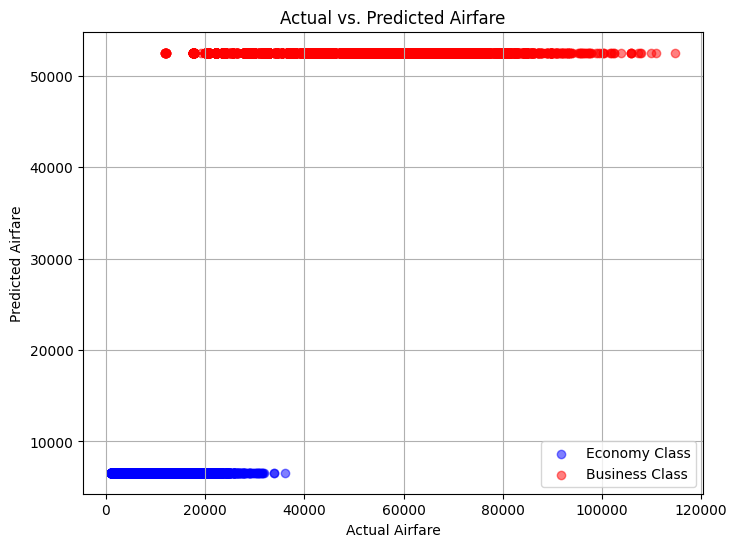

In [12]:
# Plotting scatter plot for Economy and Business classes.
plt.figure(figsize=(8, 6))
plt.scatter(y_test[x_test['class'] == 0], y_pred[x_test['class'] == 0], color='blue', alpha=0.5, label='Economy Class')
plt.scatter(y_test[x_test['class'] == 1], y_pred[x_test['class'] == 1], color='red', alpha=0.5, label='Business Class')
plt.title('Actual vs. Predicted Airfare')
plt.xlabel('Actual Airfare')
plt.ylabel('Predicted Airfare')
plt.legend()
plt.grid(True)
plt.show()


We can look at the above graph and infer that a model trained solely based on the 'class' feature will end up giving two flight prices only, as 'class' only has 2 values: Economy and Business.

Inferring from the correlation matrix calculated in Phase 1, we are attempting to try the 'Airline' feature as the independent variable. The 'Airline' column was more correlated with the Airfare as the correlation coefficient between them was 0.43.

In [13]:
# We'll encode the categorical variable "airline" into integers.
df["airline"] = df["airline"].replace({'Indigo':0, 'AirAsia':1, 'GO_FIRST':2, 'SpiceJet':3, 'Air_India':4, 'Vistara':5}).astype(int)

C:\Users\Aryan\AppData\Local\Temp\ipykernel_12624\3168523670.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["airline"] = df["airline"].replace({'Indigo':0, 'AirAsia':1, 'GO_FIRST':2, 'SpiceJet':3, 'Air_India':4, 'Vistara':5}).astype(int)


In [14]:
# Selecting the independent variable (Flight class) and dependent variable (Price).
x = df[['airline']]
y = df[['price']]

# Dividing the dataset into Training and Testing data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=26)

# Using the Linear regression model and fitting it to our data.
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Evaluating the model.
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 408677380.90532994
R-squared: 0.20443845079573897
Coefficients: [[5599.47554601]]
Intercept: [1242.39365475]


We can observe from the output above that the Mean Squared Error(MSE) is very high. MSE measures the average squared difference between actual and predicted values. MSE should be as low as possible as a lower MSE indicates better performance of the model. Therefore, we can see that the linear regression model we have fit based on Airline company does not predict the airfare accurately. Attributing to its bad performance, we won't be using this model anymore.

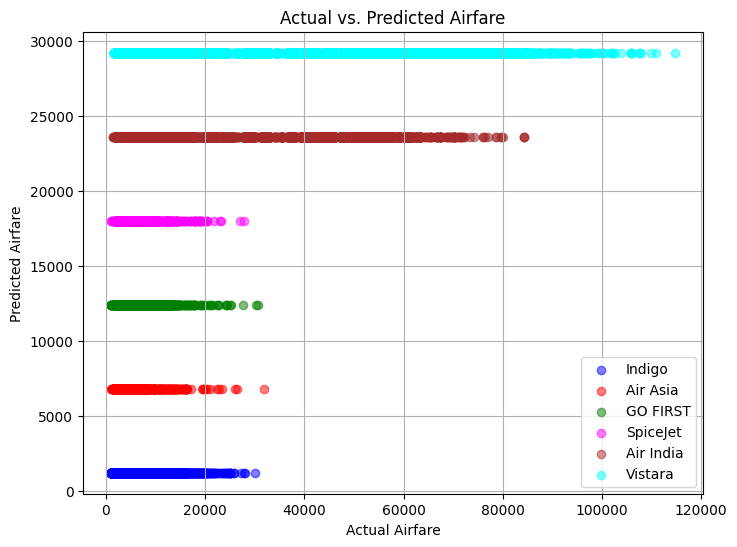

In [15]:
# Plotting scatter plot for various airlines.
plt.figure(figsize=(8, 6))
plt.scatter(y_test[x_test['airline'] == 0], y_pred[x_test['airline'] == 0], color='blue', alpha=0.5, label='Indigo')
plt.scatter(y_test[x_test['airline'] == 1], y_pred[x_test['airline'] == 1], color='red', alpha=0.5, label='Air Asia')
plt.scatter(y_test[x_test['airline'] == 2], y_pred[x_test['airline'] == 2], color='green', alpha=0.5, label='GO FIRST')
plt.scatter(y_test[x_test['airline'] == 3], y_pred[x_test['airline'] == 3], color='magenta', alpha=0.5, label='SpiceJet')
plt.scatter(y_test[x_test['airline'] == 4], y_pred[x_test['airline'] == 4], color='brown', alpha=0.5, label='Air India')
plt.scatter(y_test[x_test['airline'] == 5], y_pred[x_test['airline'] == 5], color='cyan', alpha=0.5, label='Vistara')
plt.title('Actual vs. Predicted Airfare')
plt.xlabel('Actual Airfare')
plt.ylabel('Predicted Airfare')
plt.legend()
plt.grid(True)
plt.show()


Based on the analysis using two simple linear regression models, each with a different input feature, it is evident that relying on a single feature to predict future airfare is inadequate, given the size of our database, which comprises approximately 300,000 rows. To enhance the accuracy of our linear model, we will have to incorporate more number of features.

In [16]:
# We'll encode the categorical variables "source_city", "destination_city", "departure_time" and "arrival_time" into integers.

df['source_city'] = df['source_city'].replace({'Bangalore': 1, 'Chennai': 2, 'Delhi': 3, 'Hyderabad': 4, 'Kolkata': 5, 'Mumbai': 6})
df['destination_city'] = df['destination_city'].replace({'Bangalore': 1, 'Chennai': 2, 'Delhi': 3, 'Hyderabad': 4, 'Kolkata': 5, 'Mumbai': 6})
df['departure_time'] = df['departure_time'].replace({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})
df['arrival_time'] = df['departure_time'].replace({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})

C:\Users\Aryan\AppData\Local\Temp\ipykernel_12624\1371573559.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['source_city'] = df['source_city'].replace({'Bangalore': 1, 'Chennai': 2, 'Delhi': 3, 'Hyderabad': 4, 'Kolkata': 5, 'Mumbai': 6})
C:\Users\Aryan\AppData\Local\Temp\ipykernel_12624\1371573559.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['destination_city'] = df['destination_city'].replace({'Bangalore': 1, 'Chennai': 2, 'Delhi': 3, 'Hyderabad': 4, 'Kolkata': 5, 'Mumbai': 6})
C:\Users\Aryan\AppData\Local\Temp\

In [17]:
# Excluding the below columns.
columns_to_exclude = ['flight', 'price']

# Creating a new DataFrame for the Training data and Testing data.
x = df.drop(columns=columns_to_exclude)
y = df[['price']]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Training the model.
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)

y_pred = LR_model.predict(x_test)

# Evalutaing the model.
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

print('Coefficients:', LR_model.coef_)
print('Intercept:', LR_model.intercept_)

Mean Squared Error: 50931518.36547831
R-squared: 0.9011963728396308
Coefficients: [[ 4.49428807e+02  8.37910891e+01 -4.28085724e+13  6.17814124e+03
   4.28085724e+13  1.18876598e+02  4.51130079e+04  2.81126346e+01
  -1.29508510e+02]]
Intercept: [1967.12609033]


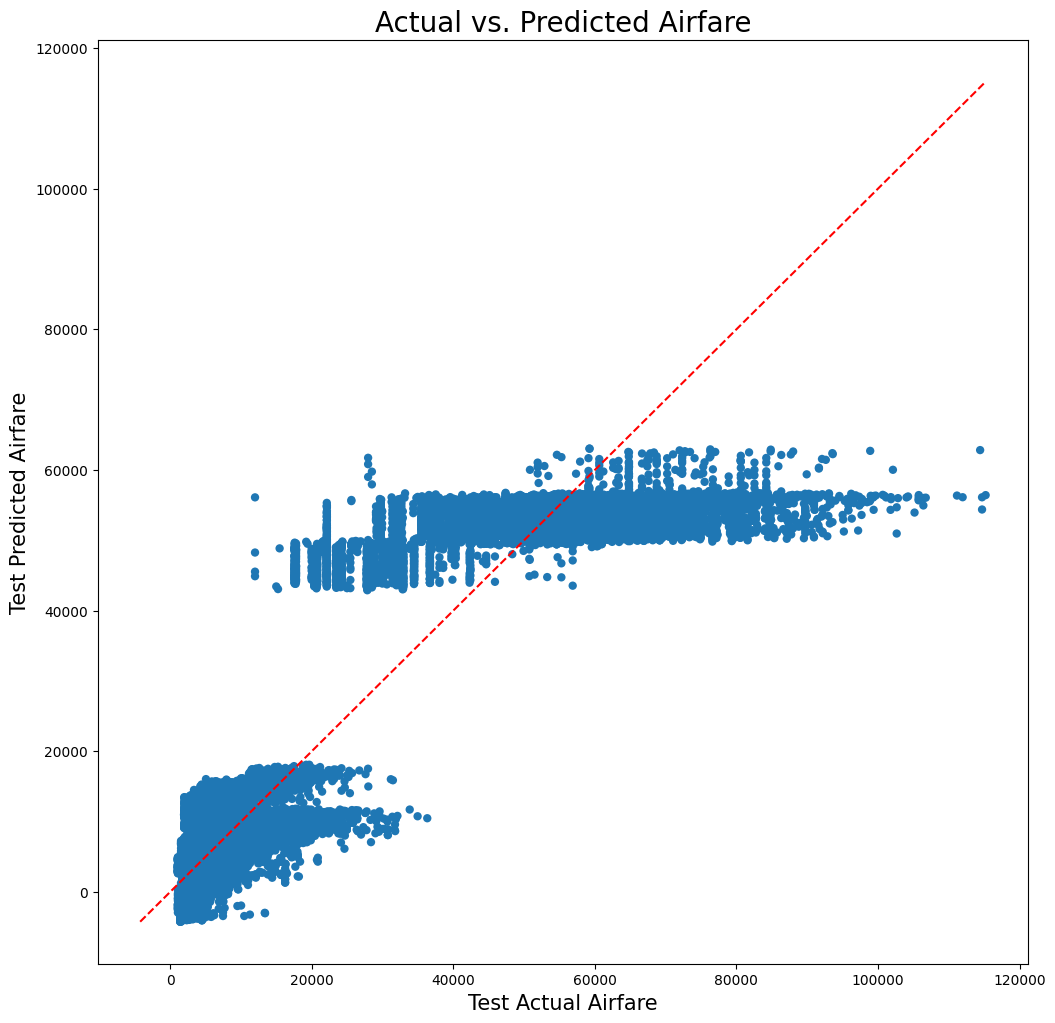

In [19]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title("Actual vs. Predicted Airfare", fontsize=20)
ax.set_ylabel('Test Predicted Airfare', fontsize=15)
ax.set_xlabel('Test Actual Airfare', fontsize=15)

# Here, we are adding the y = x line in red color to observe the variation between the Actual Price and Predicted Price.
max_val = max(max(y_test.squeeze()), max(y_pred.squeeze()))
min_val = min(min(y_test.squeeze()), min(y_pred.squeeze()))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

sns.scatterplot(x=y_test.squeeze(), y=y_pred.squeeze(), ax=ax, edgecolor='none')
plt.show()

## Conclusion

While a high R-squared score suggests that the model effectively captures the relationship between the independent variables and the dependent variable, the persistently high MSE indicates that the model might not provide accurate predictions of the target variable. Despite the strong fit indicated by the R-squared score, the high MSE undermines the model's effectiveness for predictive purposes. Therefore, despite the promising explanatory power of the multiple linear regression model, its predictive performance remains questionable. Therefore, we see the Linear Regression Learning model as ineffective for this particular dataset.